# Elemento `Bar`

El elemento `Truss` plano es un elemento finito con coordenadas locales y globales, tiene un modulo de elasticidad $E$, una sección transversal $A$ y una longitud $L$. Cada elemento tiene dos nodos y un ángulo de inclinación $\theta$ medido en sentido antihorario desde el eje $X$ global, como se muestra en la figura. Sean $C=\cos(\theta)$ y $S=\sin(\theta)$, entonces la matriz de rigidez por elemento está dada por:

$$
k = \frac{EA}{L}
\begin{bmatrix}
C^2 & CS & -C^2 & -CS \\
CS & S^2 & -CS & -S^2 \\
-C^2 & -CS & C^2 & CS \\
-CS & -S^2 & CS & S^2 \\
\end{bmatrix}
$$

<img src="src/truss-element/truss_element.PNG" width="200px">

El elemento `Truss` tiene dos grados de libertad en cada nodo: desplazamientos en `x` e `y`. 

La fuerza en cada elemento se calcula como sigue:

$$
f = \frac{EA}{L} \begin{bmatrix} -C & -S & C & S \end{bmatrix} \left\{ u \right\}
$$

Donde $f$ es la fuerza (escalar) en el elemento y $\left\{u\right\}$ el vector de desplazamientos en el elemento.

El esfuerzo en el elemento se obtiene dividiendo la fuerza $f$ por la sección transversal, es decir:

$$
\sigma = \frac{f}{A}
$$

## Ejemplo 1. Estructura simple de tres elementos

<img src="src/truss-element/example_01.png" width="200px">

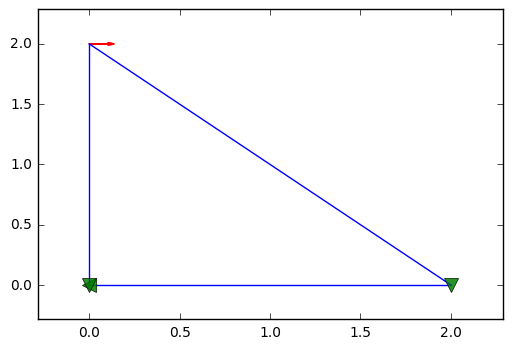

In [1]:
%matplotlib inline
from nusa import *

E,A = 200e9, 0.01
n1 = Node((0,0))
n2 = Node((2,0))
n3 = Node((0,2))
e1 = Truss((n1,n2),E,A)
e2 = Truss((n1,n3),E,A)
e3 = Truss((n2,n3),E,A)
m = TrussModel()
for n in (n1,n2,n3): m.addNode(n)
for e in (e1,e2,e3): m.addElement(e)
m.addConstraint(n1, ux=0, uy=0)
m.addConstraint(n2, uy=0)
m.addForce(n3, (500,0))
m.plot_model()
m.solve()

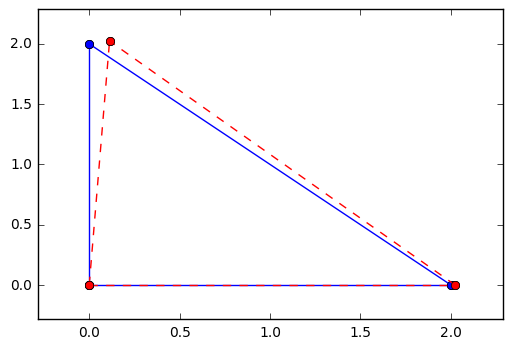

In [2]:
m.plot_deformed_shape()

In [3]:
m.simple_report()


    NuSA Simple Report

Model: Truss Model 01
Number of nodes: 3
Number of elements: 3

NODAL DISPLACEMENTS
======  ===========  =====
  Node           UX     UY
======  ===========  =====
     1            0      0
     2        5e-07      0
     3  2.41421e-06  5e-07
======  ===========  =====

NODAL FORCES
======  ===========  ============
  Node           FX            FY
======  ===========  ============
     1         -500          -500
     2  2.84217e-14           500
     3          500  -2.27374e-13
======  ===========  ============

ELEMENT FORCES
=========  ========
  Element         F
=========  ========
        1       500
        2       500
        3  -707.107
=========  ========

ELEMENT STRESSES
=========  ========
  Element         S
=========  ========
        1     50000
        2     50000
        3  -70710.7
=========  ========


FINITE-ELEMENT MODEL INFO

NODES:
======  ===  ===
  Node    X    Y
======  ===  ===
     1    0    0
     2    2    0
     3    0    

---

## Ejemplo 2.


<img src="src/truss-element/example_02.png" width="250px">

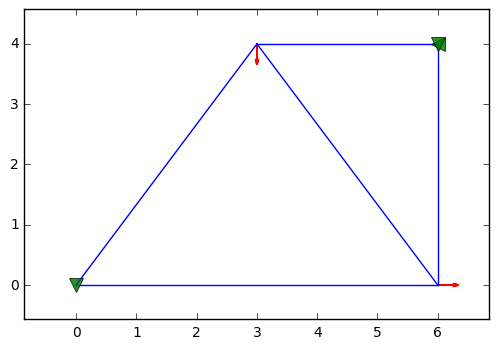

In [4]:
E,A = 200e9, 0.01
n1 = Node((0,0))
n2 = Node((6,0))
n3 = Node((6,4))
n4 = Node((3,4))
e1 = Truss((n1,n2),E,A)
e2 = Truss((n2,n3),E,A)
e3 = Truss((n4,n3),E,A)
e4 = Truss((n1,n4),E,A)
e5 = Truss((n2,n4),E,A)
m = TrussModel()
for n in (n1,n2,n3,n4): m.addNode(n)
for e in (e1,e2,e3,e4,e5): m.addElement(e)
m.addConstraint(n1, uy=0)
m.addConstraint(n3, ux=0, uy=0)
m.addForce(n2, (600,0))
m.addForce(n4, (0,-400))
m.plot_model()
m.solve()

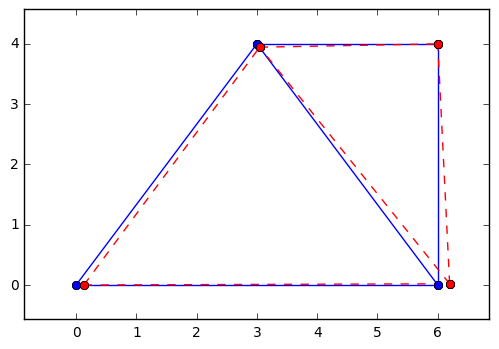

In [5]:
m.plot_deformed_shape()

In [6]:
m.simple_report()


    NuSA Simple Report

Model: Truss Model 01
Number of nodes: 4
Number of elements: 5

NODAL DISPLACEMENTS
======  =========  ===========
  Node         UX           UY
======  =========  ===========
     1  2.575e-06            0
     2  3.925e-06        4e-07
     3          0            0
     4      9e-07  -1.0875e-06
======  =========  ===========

NODAL FORCES
======  ============  ===========
  Node            FX           FY
======  ============  ===========
     1  -1.13687e-13          600
     2           600  1.13687e-13
     3          -600         -200
     4   1.94964e-13         -400
======  ============  ===========

ELEMENT FORCES
=========  ====
  Element     F
=========  ====
        1   450
        2  -200
        3  -600
        4  -750
        5   250
=========  ====

ELEMENT STRESSES
=========  ======
  Element       S
=========  ======
        1   45000
        2  -20000
        3  -60000
        4  -75000
        5   25000
=========  ======


FINITE-ELEMENT 